# Assignment Data Sets

### Goal

Here is a dataset that shows a simple 2-node network:  the attendance of 18 Southern Women at 14 social events:

1. Brief Description. Small “musty” datasets like that from this 1941 study have proven very valuable in testing and comparing new network algorithms.
2. Dataset: http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/davis.dat
3. Python code to create dataset: https://networkx.github.io/documentation/stable/auto_examples/algorithms/plot_davis_club.html

What can you infer about the relationships between (1) the women, and (2) the social events?  

**Load Data**

The below code is from https://networkx.org/documentation/stable/auto_examples/algorithms/plot_davis_club.html .

load the davis_southern_women_graph and create the *women* and *clubs* list.

The graph is displayed with labels.

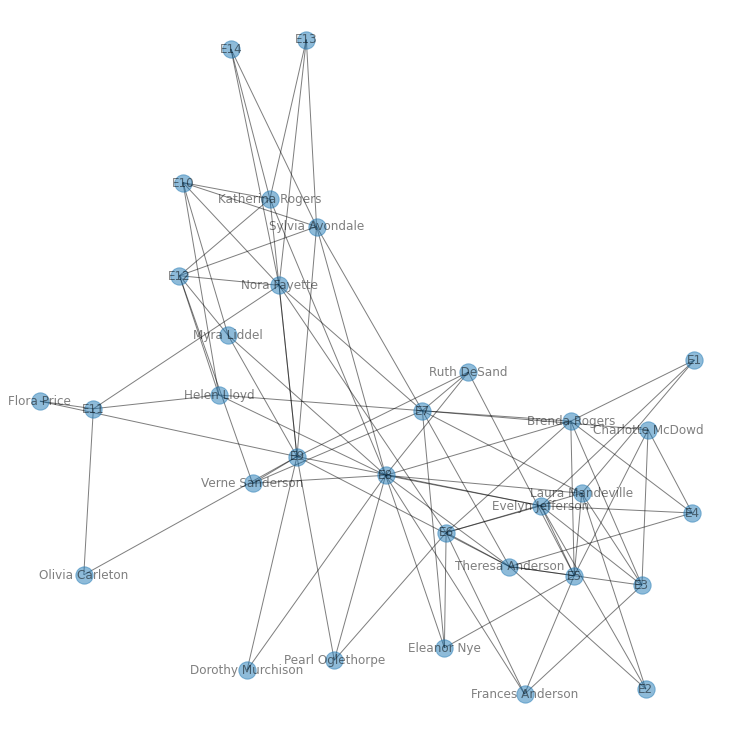

['Evelyn Jefferson', 'Laura Mandeville', 'Theresa Anderson', 'Brenda Rogers', 'Charlotte McDowd', 'Frances Anderson', 'Eleanor Nye', 'Pearl Oglethorpe', 'Ruth DeSand', 'Verne Sanderson', 'Myra Liddel', 'Katherina Rogers', 'Sylvia Avondale', 'Nora Fayette', 'Helen Lloyd', 'Dorothy Murchison', 'Olivia Carleton', 'Flora Price']
['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14']


In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.bipartite as bipartite

plt.figure(figsize=(10,10))
G = nx.davis_southern_women_graph()
women = G.graph["top"]
clubs = G.graph["bottom"]

nx.draw(G,with_labels=True,alpha=0.5)
plt.show()

print(women)
print(clubs)

**Biadjacency Matrix**

Displaying the Biadjacency matrix.

In [3]:
print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))

Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1


**project bipartite graph onto women nodes**

The bipartite graph is projected onto women nodes

The women who take part in the same event are connected.

In [16]:
# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)


In [17]:
# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print()
print("#Friend meetings, Member")
for w in women:
    print(f"{W.degree(w, weight='weight')} {w}")


#Friend meetings, Member
50 Evelyn Jefferson
45 Laura Mandeville
57 Theresa Anderson
46 Brenda Rogers
24 Charlotte McDowd
32 Frances Anderson
36 Eleanor Nye
31 Pearl Oglethorpe
40 Ruth DeSand
38 Verne Sanderson
33 Myra Liddel
37 Katherina Rogers
46 Sylvia Avondale
43 Nora Fayette
34 Helen Lloyd
24 Dorothy Murchison
14 Olivia Carleton
14 Flora Price


**Graph of bipartite network**

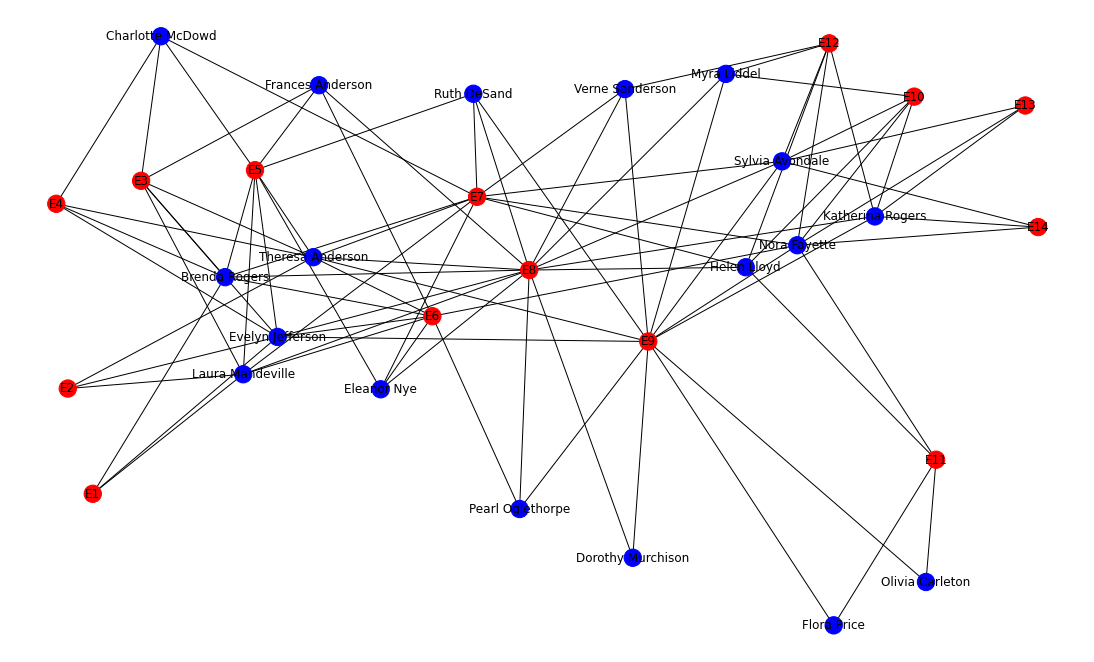

In [21]:
plt.figure(figsize=(15,9))
club = {clubs[i]: 1.0 for i in range(0, len(clubs))}
club_new=[club.get(node,0.5) for node in G.nodes()]

nx.draw(G, cmap=plt.get_cmap('bwr'), node_color=club_new, with_labels=True)
plt.show()

**Weighted Edges**

The below code is from SNA textbook page 104

The edges are weighted based on common clubs.

The resulting graph is displayed.

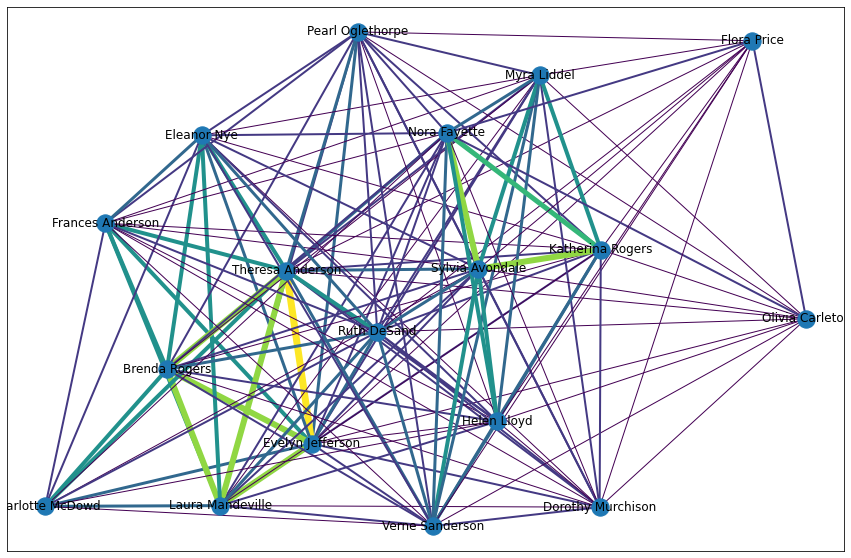

In [13]:
plt.figure(figsize=(15,10))
weights=[edata['weight'] for f,t,edata in W.edges(data=True)]  #SNA pg104
nx.draw_networkx(W,width=weights, edge_color=weights)
plt.show()

**Analysis**

From the above weighted graph we can see that when the women are co-members their connection is stronger(the thick edges) and when they are not the connection is weak(the thin edges).

**Video**

https://youtu.be/waIx1NkF-pk 